<a href="https://colab.research.google.com/github/ge43jef/GEEHYDRO/blob/perfectdatacodes/SVRmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import csv
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
import plotly.express as px
import statistics
from scipy import stats

In [21]:
import pandas as pd
from glob import glob

files = glob('FLX*')

dataframes = []

columns_to_read = ["SW_IN_F","LW_IN_F", "PA_F", "WS_F", "VPD_F", "temperature_2m", "total_precipitation_sum", "LE_CORR"]

for file in files:
    df = pd.read_excel(file, usecols=columns_to_read, header=0)  # Replace read_excel with the appropriate function for your file format
    dataframes.append(df)

# Concatenate all the DataFrames into a single DataFrame
df = pd.concat(dataframes, ignore_index=True)


In [22]:
count_9999 = (df["LE_CORR"] == -9999).sum()
print("Number of values with -9999 in LE_CORR:", count_9999)
df = df[df["LE_CORR"] != -9999]

Number of values with -9999 in LE_CORR: 121


In [23]:
X = df.drop("LE_CORR", axis=1)
y = df["LE_CORR"]

In [24]:
# Train Test Splitting the data

X = np.array(X)
Y = y.values
X_train, X_test, Y_train, Y_test = train_test_split(
 X, Y, test_size=0.30, random_state=42)

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [26]:
df.columns

Index(['SW_IN_F', 'LW_IN_F', 'VPD_F', 'PA_F', 'WS_F', 'LE_CORR',
       'temperature_2m', 'total_precipitation_sum'],
      dtype='object')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17409 entries, 0 to 17529
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SW_IN_F                  17409 non-null  float64
 1   LW_IN_F                  17409 non-null  float64
 2   VPD_F                    17409 non-null  float64
 3   PA_F                     17409 non-null  float64
 4   WS_F                     17409 non-null  float64
 5   LE_CORR                  17409 non-null  float64
 6   temperature_2m           17409 non-null  float64
 7   total_precipitation_sum  17409 non-null  float64
dtypes: float64(8)
memory usage: 1.2 MB


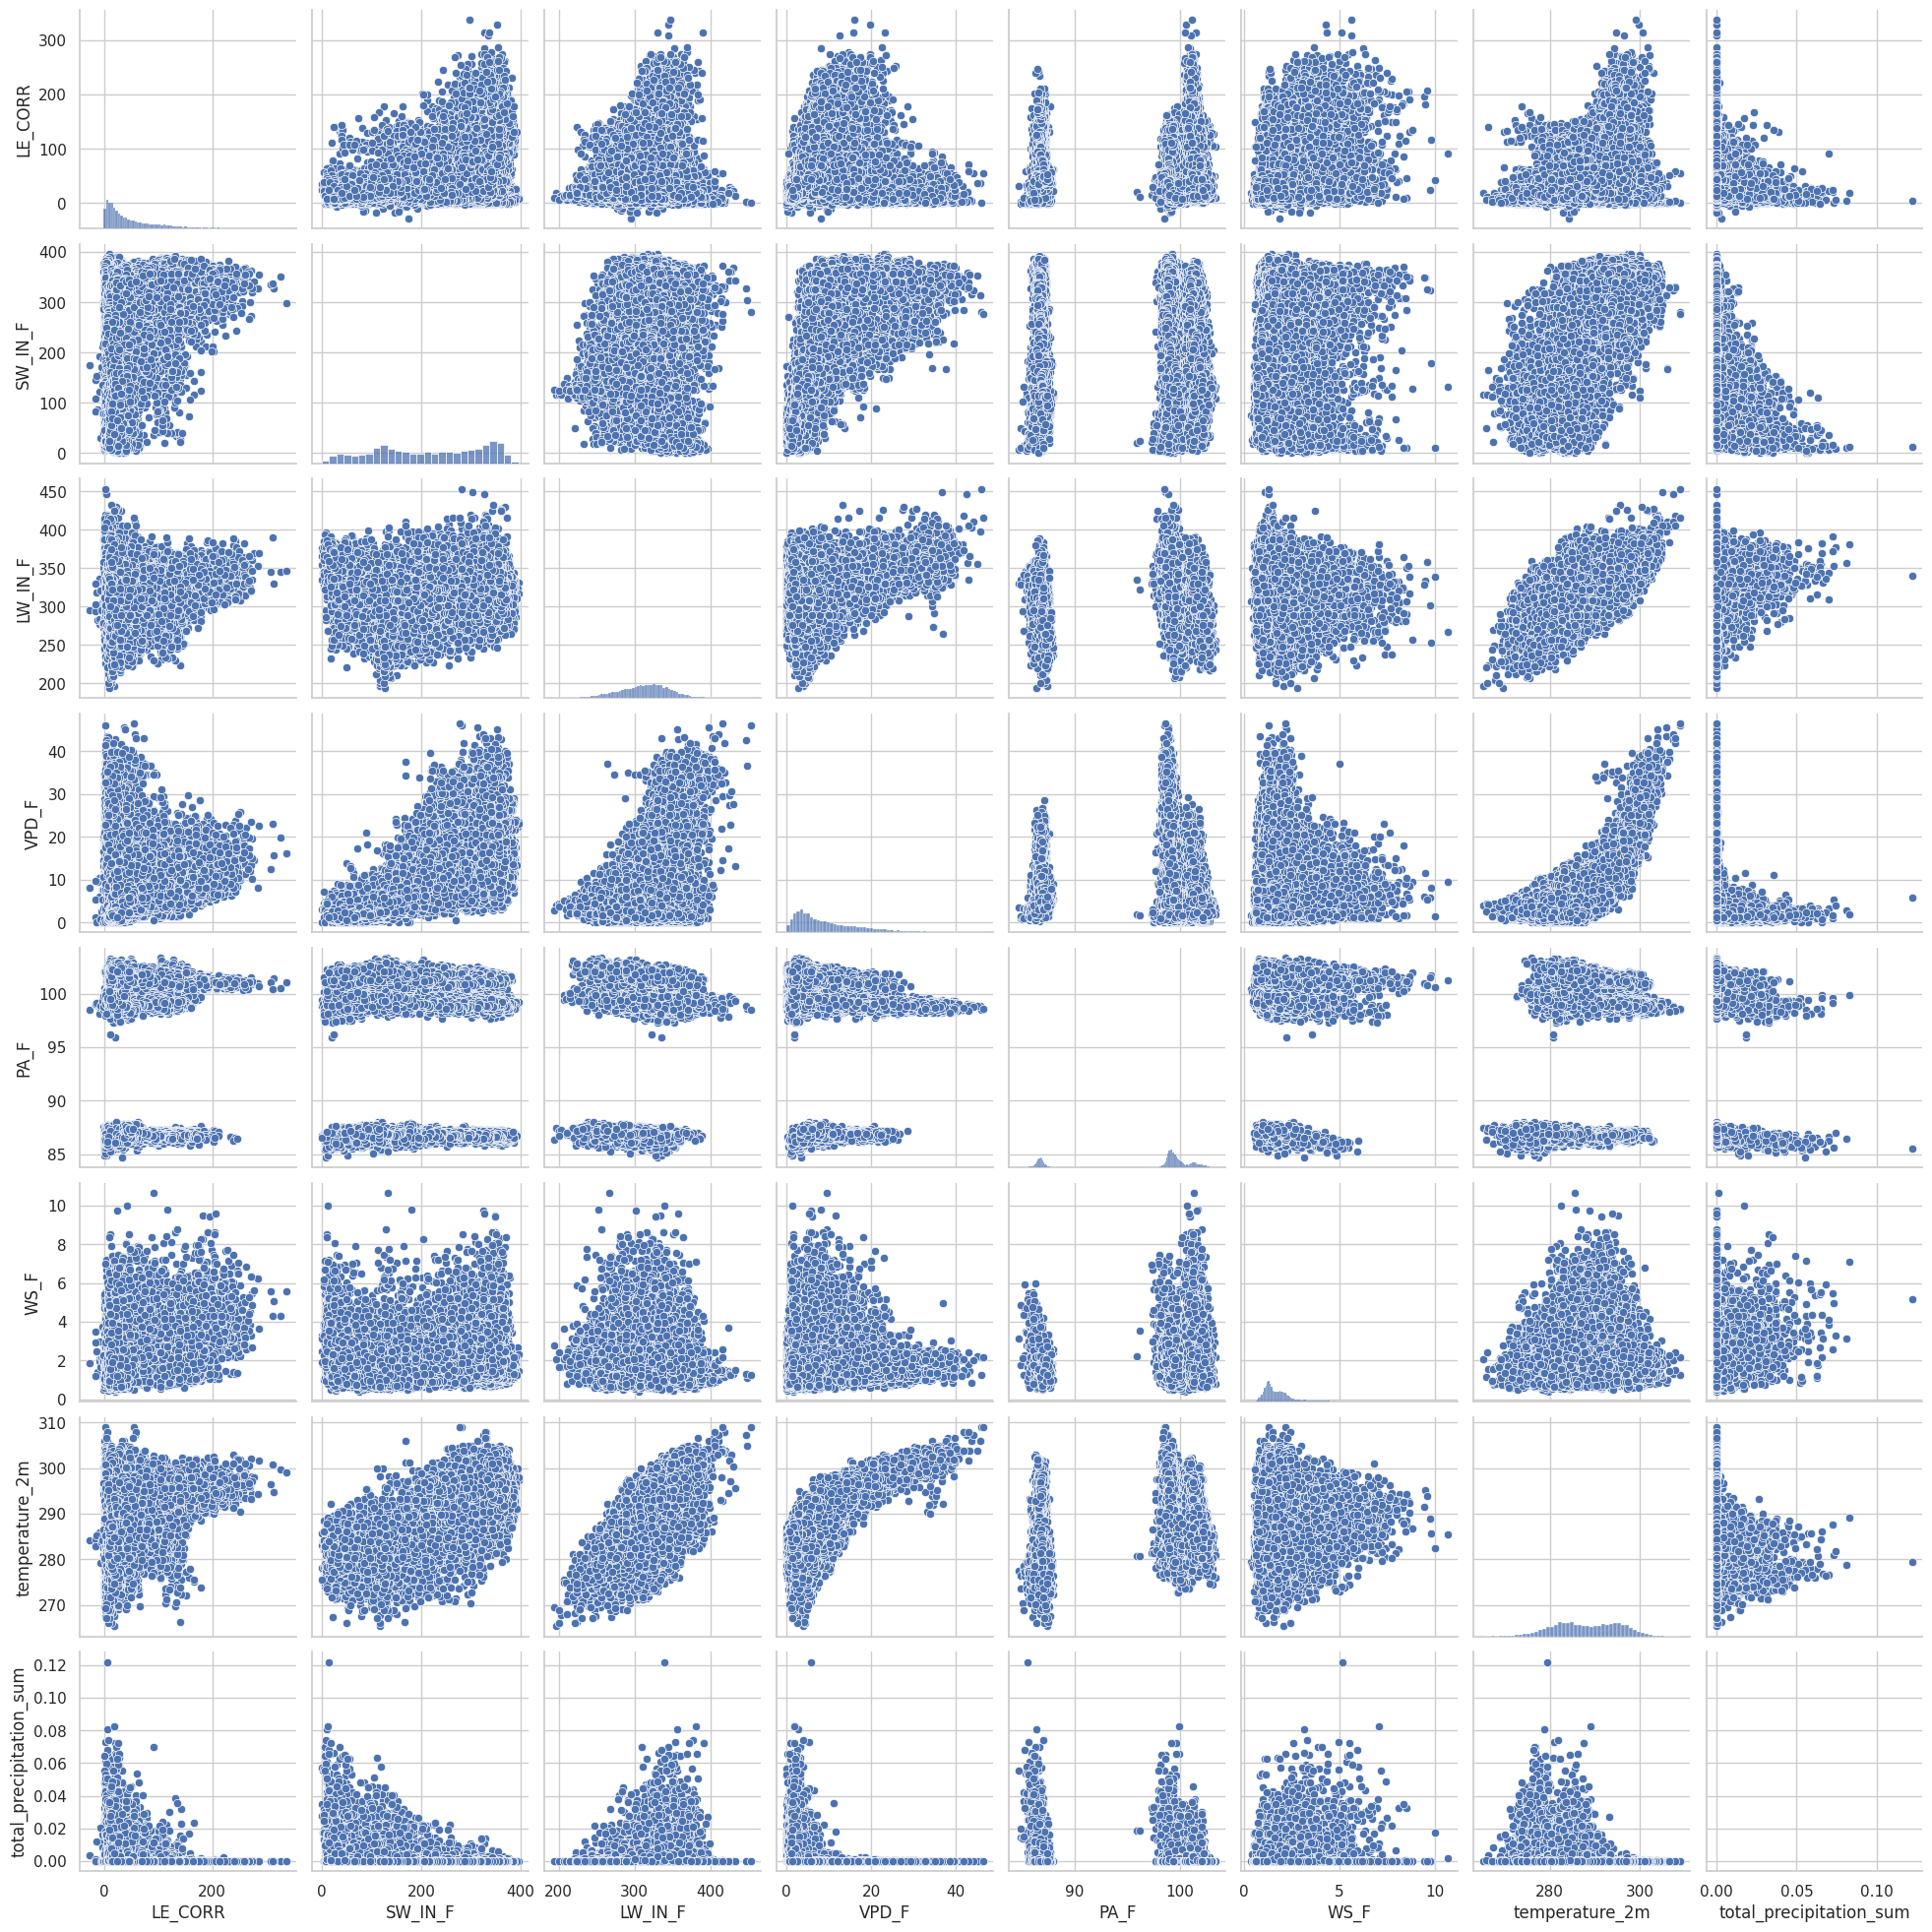

In [87]:
# Concatenate the predictor variables and target variable into a single dataframe
data = df[['LE_CORR','SW_IN_F', 'LW_IN_F', 'VPD_F', 'PA_F', 'WS_F', 'temperature_2m', 'total_precipitation_sum']]
sns.set_style('whitegrid')
# Plot the pair plot
sns.pairplot(data)
plt.show()

In [88]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
df_sc = scale.fit_transform(df)
df_sc = pd.DataFrame(df_sc, columns=df.columns)

In [89]:
rand_state = 1000

In [90]:
y = df_sc['LE_CORR']
X = df_sc.drop('LE_CORR', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rand_state)

In [91]:
from sklearn.svm import SVR

In [100]:
# Fitting SVM regression to the Training set
SVM_regression = SVR()
SVM_regression.fit(X_train, y_train)

SVR()

In [101]:
# Predicting the Test set results
y_hat = SVM_regression.predict(X_test)

In [102]:
predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat})
predictions.head()

,y_test,y_hat
15518,0.226527,0.244532
15547,0.149968,0.167418
12267,0.121964,0.196238
7764,0.288467,0.397402
13610,0.157559,0.203801


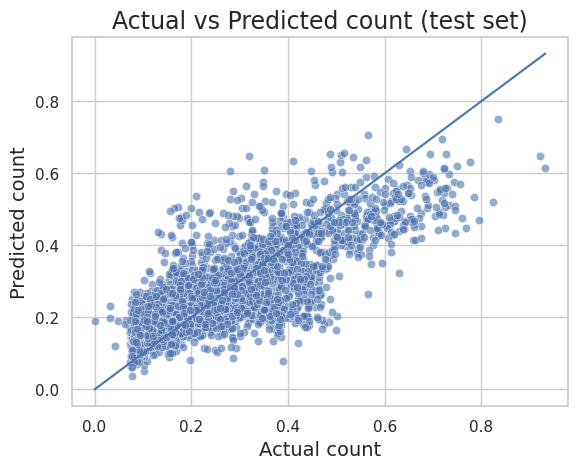

In [103]:
sns.scatterplot(x=y_test, y=y_hat, alpha=0.6)
sns.lineplot(x=y_test, y=y_test)

plt.xlabel('Actual count', fontsize=14)
plt.ylabel('Predicted count', fontsize=14)
plt.title('Actual vs Predicted count (test set)', fontsize=17)
plt.show()

In [104]:
SVM_regression.score(X_test, y_test)

0.635206740516272

In [105]:
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

0.1

In [106]:
my_param_grid = {'C': [1,10,100], 'gamma': [1,0.1,0.01], 'kernel': ['rbf']}

In [107]:
from sklearn.model_selection import GridSearchCV

In [108]:
GridSearchCV(estimator=SVR(),param_grid= my_param_grid, refit = True, verbose=3, cv=5 )

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=3)

In [121]:
grid = GridSearchCV(estimator=SVR(),param_grid= my_param_grid, refit = True, verbose=2, cv=10 )
# verbose just means the text output describing the process. (the greater the number the more detail you will get).

In [ ]:
# May take a while!
grid.fit(X_train,y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   1.5s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   1.4s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   1.3s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   2.3s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   1.7s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   1.4s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   1.3s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   1.4s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   1.3s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   1.4s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   1.6s
[CV] END .........................C=1, gamma=0.1

In [111]:
grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [112]:
grid.best_estimator_

SVR(C=100, gamma=1)

In [113]:
y_hat_optimized = grid.predict(X_test)

In [114]:
predictions['y_hat_optimized'] = y_hat_optimized
predictions.head()

,y_test,y_hat,y_hat_optimized
15518,0.226527,0.244532,0.306339
15547,0.149968,0.167418,0.159611
12267,0.121964,0.196238,0.201198
7764,0.288467,0.397402,0.395299
13610,0.157559,0.203801,0.202474


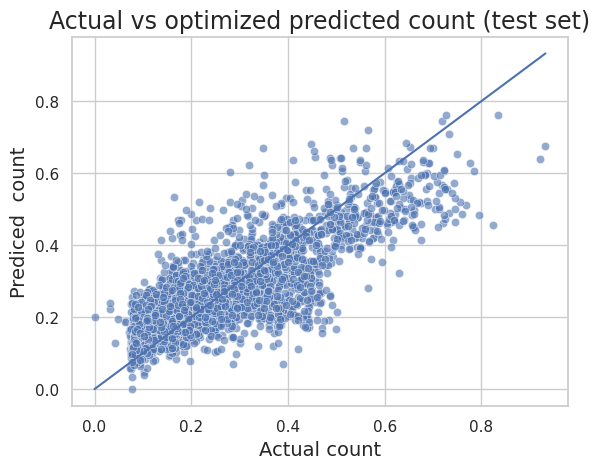

In [115]:
sns.scatterplot(x=y_test, y=y_hat_optimized, alpha=0.6)
sns.lineplot(x= y_test, y=y_test)

plt.xlabel('Actual count', fontsize=14)
plt.ylabel('Prediced  count', fontsize=14)
plt.title('Actual vs optimized predicted count (test set)', fontsize=17)
plt.show()

In [116]:
grid.score(X_test, y_test)

0.6565116924109298

In [117]:
MSE_test_opt = round(np.mean(np.square(y_test - y_hat_optimized)),2)
RMSE_test_opt = round(np.sqrt(MSE_test_opt),2)
RMSE_test_opt

0.1

In [118]:
from sklearn.model_selection import cross_val_score

In [119]:
NMSE = cross_val_score(estimator = SVR(C=10, gamma=0.01), X = X_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )

In [120]:
MSE_CV = round(np.mean(-NMSE),4)
RMSE_CV = round(np.sqrt(MSE_CV),4)
RMSE_CV

0.1005